
## Pharmaceutical Sales prediction across multiple stores


### Explanatory Data Analysis of Rossman sales

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
%cd MyDrive/Pharmaceutical-Sales-Prediction/

/content/drive/MyDrive/Pharmaceutical-Sales-Prediction


In [16]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [19]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
store_data = pd.read_csv('data/store.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)




Convert all categorical columns to object across the three datasets


In [20]:
# helper function we are going to use to convert all categorical columns to object across the given datasets
def convert_cat_cols_obj(dataset, col_lst):
    for i in col_lst: 
        dataset = dataset.astype({i:'object'})
    return dataset

In [21]:
## Converting categorical columns in train set into object
train_cols = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday']
train_data = convert_cat_cols_obj(train_data, train_cols)

In [22]:
## Converting categorical columns in train set into object
test_cols = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday']
test_data = convert_cat_cols_obj(test_data, test_cols)

In [23]:
## Converting categorical columns in store set into object
store_cols = ['StoreType','Assortment','CompetitionOpenSinceMonth','Promo2']
store_data = convert_cat_cols_obj(store_data, store_cols)


In [24]:
## Dealing with cardinality
train_data['StateHoliday'].replace({0:'o','0':'o'},inplace=True)
test_data['StateHoliday'].replace({'0':'o'},inplace=True)

## Understanding the Data

In [25]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,o,1
1,2,5,2015-07-31,6064,625,1,1,o,1
2,3,5,2015-07-31,8314,821,1,1,o,1
3,4,5,2015-07-31,13995,1498,1,1,o,1
4,5,5,2015-07-31,4822,559,1,1,o,1


In [26]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,o,0
1,2,3,4,2015-09-17,1.0,1,o,0
2,3,7,4,2015-09-17,1.0,1,o,0
3,4,8,4,2015-09-17,1.0,1,o,0
4,5,9,4,2015-09-17,1.0,1,o,0


In [27]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [28]:
# showing only the integer object description
store_data.describe() 

,Store,CompetitionDistance,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,571.000000,571.000000
mean,558.00000,5404.901079,2008.668857,23.595447,2011.763573
std,322.01708,7663.174720,6.195983,14.141984,1.674935
min,1.00000,20.000000,1900.000000,1.000000,2009.000000
25%,279.50000,717.500000,2006.000000,13.000000,2011.000000
50%,558.00000,2325.000000,2010.000000,22.000000,2012.000000
75%,836.50000,6882.500000,2013.000000,37.000000,2013.000000
max,1115.00000,75860.000000,2015.000000,50.000000,2015.000000


In [29]:
# showing only the integer object description
train_data.describe() 

,Store,Sales,Customers
count,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,5.773819e+03,6.331459e+02
std,3.219087e+02,3.849926e+03,4.644117e+02
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,3.727000e+03,4.050000e+02
50%,5.580000e+02,5.744000e+03,6.090000e+02
75%,8.380000e+02,7.856000e+03,8.370000e+02
max,1.115000e+03,4.155100e+04,7.388000e+03


In [30]:
 # showing only the integer object description
test_data.describe()

,Id,Store
count,41088.000000,41088.000000
mean,20544.500000,555.899533
std,11861.228267,320.274496
min,1.000000,1.000000
25%,10272.750000,279.750000
50%,20544.500000,553.500000
75%,30816.250000,832.250000
max,41088.000000,1115.000000


In [31]:
#shows row by column value of the train dataset
train_data.shape 

(1017209, 9)

In [32]:
#shows row by column value of the test dataset
test_data.shape 

(41088, 8)

In [33]:
#shows row by column value of the store dataset
store_data.shape 

(1115, 10)



checking each column what unique value we have for train test and store data sets 


In [34]:
store_data.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [35]:
train_data.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         4
SchoolHoliday        2
dtype: int64

In [36]:
test_data.nunique()

Id               41088
Store              856
DayOfWeek            7
Date                48
Open                 2
Promo                2
StateHoliday         2
SchoolHoliday        2
dtype: int64

Note: from above we can see that our columns respective unique values

this will help us in identifying which value we should use for visualization


In [37]:
print("Joining train set with an additional store information.")

# by specifying inner join we make sure that only those observations 
# that are present in both train and store sets are merged together
train_store = pd.merge(train_data, store_data, how = 'inner', on = 'Store')

print("In total: ", train_store.shape)
train_store.head()

Joining train set with an additional store information.
In total:  (1017209, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,o,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,o,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,o,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,o,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,o,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN



## Check for seasonality in both training and test sets - are the seasons similar between these two groups?

seasonality check series for Training dataset *

In [38]:
time_series_train = train_data[['Date','Sales']]

In [39]:
time_series_train.head()

,Date,Sales
0,2015-07-31,5263
1,2015-07-31,6064
2,2015-07-31,8314
3,2015-07-31,13995
4,2015-07-31,4822


In [40]:
time_series_train['datetime'] = pd.to_datetime(time_series_train['Date'])
time_series_train = time_series_train.set_index('datetime')
time_series_train.drop(['Date'], axis=1, inplace=True)
time_series_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sales
datetime,
2015-07-31,5263
2015-07-31,6064
2015-07-31,8314
2015-07-31,13995
2015-07-31,4822


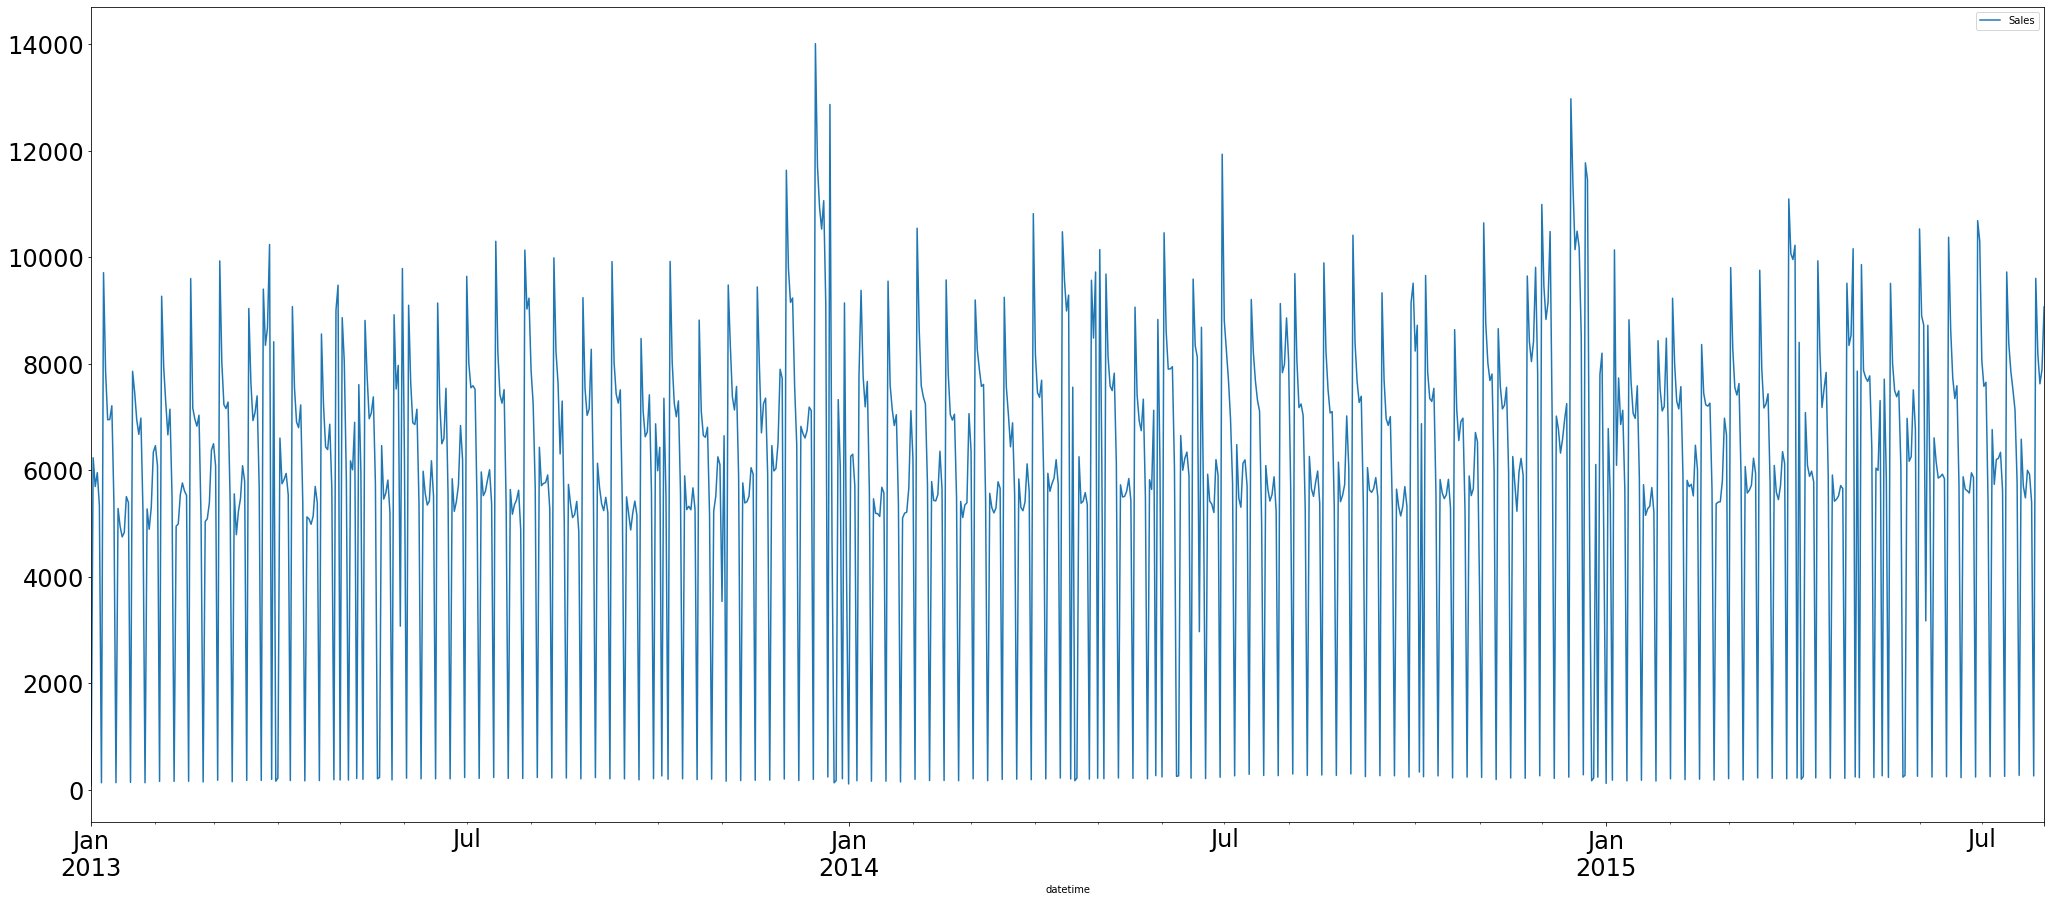

In [41]:
time_series_train_day = time_series_train.resample('D').mean()
time_series_train_day.plot(figsize=(35,15), fontsize=24)
plt.show()